In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
main_df = pd.read_csv('../data/main_dataset.csv', dtype={'ZIPCODE':str})

# print out how many properties are here in total
print(len(main_df))

178598


Remove commercial properties. Commercial properties have code C (Commercial), CC (Commercial Condominium) and CL (Commercial Land).

In [3]:
main_df = main_df[~main_df['LU'].isin(["C", "CC", "CL"])]

# print out how many properties are left after removing commercial properties
print(len(main_df))

170769


In [4]:
main_df[['UNIT_NUM', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS']]

,UNIT_NUM,RES_UNITS,COM_UNITS,RC_UNITS
0,NaN,0,0,0
1,NaN,0,0,0
2,NaN,0,0,0
3,NaN,0,0,0
4,NaN,0,0,0
...,...,...,...,...
178592,1,1,0,0
178593,NaN,0,0,0
178594,NaN,0,0,0
178595,NaN,0,0,0


In [5]:
main_df = main_df[main_df['UNIT_NUM'].notna()]
main_df[['UNIT_NUM', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS']]

,UNIT_NUM,RES_UNITS,COM_UNITS,RC_UNITS
18,1,0,0,0
19,2,0,0,0
20,3,0,0,0
21,4,0,0,0
23,1,1,0,0
...,...,...,...,...
178544,82,1,0,0
178558,1,1,0,0
178559,2,1,0,0
178591,2,1,0,0


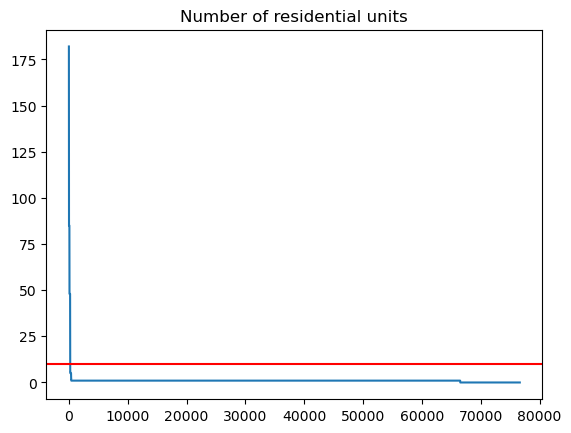

In [6]:
residential_units = np.array(sorted(main_df['RES_UNITS'], reverse = True))
plt.title("Number of residential units")
plt.plot(residential_units)
k = 10
plt.axhline(k, color='r')

In [7]:
main_df.RES_UNITS.unique()

array([  0,   1,   6,   5, 182,   2,   3,  38, 108,   8,  48,   4,  17,
        85])

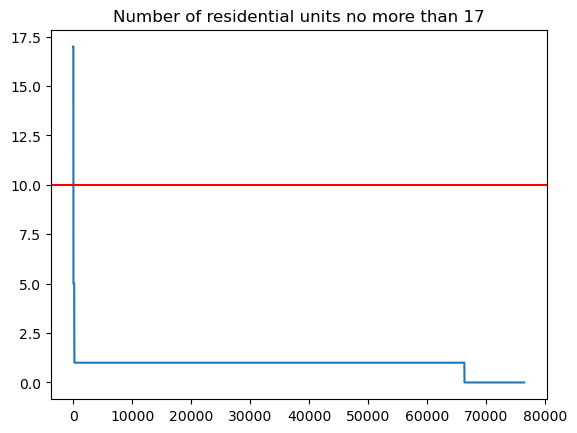

In [8]:
plt.title('Number of residential units no more than 17')
plt.plot(residential_units[residential_units <= 17])
k = 10
plt.axhline(k, color='r')

Remove properties that have no residential unites or more than 10 residential units

In [9]:
main_df = main_df.loc[main_df['RES_UNITS'] > 0]
main_df = main_df.loc[main_df['RES_UNITS'] < 10]

<BarContainer object of 16 artists>

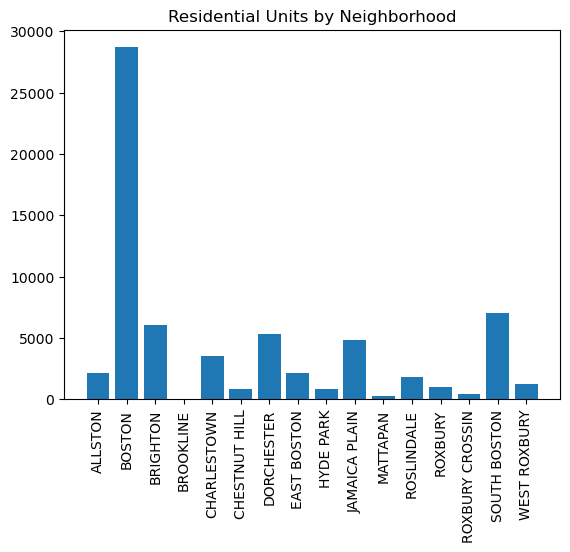

In [10]:
neighborhoods = main_df.groupby('CITY')['CITY'].count()
plt.title('Residential Units by Neighborhood')
plt.xticks(rotation=90)
plt.bar(neighborhoods.index, neighborhoods)

In [11]:
main_df
print(main_df.columns)
main_df.to_csv('../data/main_dataset_trimmed.csv')

Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'UNIT_NUM', 'CITY',
       'ZIPCODE', 'BLDG_SEQ', 'NUM_BLDGS', 'LUC', 'LU', 'LU_DESC', 'BLDG_TYPE',
       'OWN_OCC', 'OWNER', 'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL_CITY',
       'MAIL_STATE', 'MAIL_ZIPCODE', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS',
       'COM_UNITS', 'RC_UNITS', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA',
       'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT',
       'YR_REMODEL', 'STRUCTURE_CLASS', 'ROOF_STRUCTURE', 'ROOF_COVER',
       'INT_WALL', 'EXT_FINISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND',
       'BED_RMS', 'FULL_BTH', 'HLF_BTH', 'KITCHEN', 'TT_RMS', 'BDRM_COND',
       'BTHRM_STYLE1', 'BTHRM_STYLE2', 'BTHRM_STYLE3', 'KITCHEN_TYPE',
       'KITCHEN_STYLE1', 'KITCHEN_STYLE2', 'KITCHEN_STYLE3', 'HEAT_TYPE',
       'HEAT_FUEL', 'AC_TYPE', 'FIRE_PLACE', 'ORIENTATION', 'NUM_PARKING',
       'PROP_VIEW', 'CORNER_UNIT'],
      dtype='object')
